In [1]:
import tensorflow as tf
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler 
from sklearn import metrics 
np.random.seed(0)

In [2]:
filename = '../Data/SCADA_data_WT2337.csv'
datos=pd.read_csv(filename)

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.DataFrame({'date_time': datos['date_time'] ,'TempEjeLento_1': datos['TempEjeLento_1'], 'TempAmbMean': datos['TempAmbMean'], 'TempRodamMultipMean': datos['TempRodamMultipMean'], 'TempCojLAMean': datos['TempCojLAMean'],'TempCojLOAMean': datos['TempCojLOAMean'], 'TempGenMean': datos['TempGenMean'], 'PotMean': datos['PotMean'], 'VelRotorMean': datos['VelRotorMean']})
cols = df.columns.tolist()

In [5]:
#PotMean
df['PotMean'][df['PotMean']< 0] = None
df['PotMean'][df['PotMean']> 2000] = None
#TempAmbMean
df['TempAmbMean'][df['TempAmbMean']< -5] = None
df['TempAmbMean'][df['TempAmbMean']> 40] = None
#TempCojLAMean
df['TempCojLAMean'][df['TempCojLAMean']< 0] = None
df['TempCojLAMean'][df['TempCojLAMean']> 120] = None
#TempCojLOAMean
df['TempCojLOAMean'][df['TempCojLOAMean']< 0] = None
df['TempCojLOAMean'][df['TempCojLOAMean']> 120] = None
#TempEjeLento_1
df['TempEjeLento_1'][df['TempEjeLento_1']< 0] = None
df['TempEjeLento_1'][df['TempEjeLento_1']> 120] = None
#TempGenMean
df['TempGenMean'][df['TempGenMean']< 0] = None
df['TempGenMean'][df['TempGenMean']> 175] = None
#TempRodamMultipMean
df['TempRodamMultipMean'][df['TempRodamMultipMean']< 0] = None
df['TempRodamMultipMean'][df['TempRodamMultipMean']> 120] = None
#VelRotorMean
df['VelRotorMean'][df['VelRotorMean']< 0] = None
df['VelRotorMean'][df['VelRotorMean']> 50] = None

In [6]:
df['TempAmbMean']=df['TempAmbMean'].interpolate(method='pchip', order=3, limit_area='inside')
df['TempAmbMean']=df['TempAmbMean'].fillna(method='backfill')
df['TempAmbMean']=df['TempAmbMean'].fillna(method='ffill')

df['TempEjeLento_1']=df['TempEjeLento_1'].interpolate(method='pchip', order=3)
df['TempEjeLento_1']=df['TempEjeLento_1'].fillna(method='backfill')

df['TempRodamMultipMean']=df['TempRodamMultipMean'].interpolate(method='pchip', order=3)
df['TempRodamMultipMean']=df['TempRodamMultipMean'].fillna(method='backfill')

df['TempCojLAMean']=df['TempCojLAMean'].interpolate(method='pchip', order=3)
df['TempCojLAMean']=df['TempCojLAMean'].fillna(method='backfill')

df['TempCojLOAMean']=df['TempCojLOAMean'].interpolate(method='pchip', order=3)
df['TempCojLOAMean']=df['TempCojLOAMean'].fillna(method='backfill')

df['TempGenMean']=df['TempGenMean'].interpolate(method='pchip', order=3)
df['TempGenMean']=df['TempGenMean'].fillna(method='backfill')

df['PotMean']=df['PotMean'].interpolate(method='pchip', order=3)
df['PotMean']=df['PotMean'].fillna(method='backfill')

df['VelRotorMean']=df['VelRotorMean'].interpolate(method='pchip', order=3)
df['VelRotorMean']=df['VelRotorMean'].fillna(method='backfill')

df['TempEjeLento_1']=df['TempEjeLento_1'].fillna(method='ffill')
df['TempRodamMultipMean']=df['TempRodamMultipMean'].fillna(method='ffill')
df['TempCojLAMean']=df['TempCojLAMean'].fillna(method='ffill')
df['TempCojLOAMean']=df['TempCojLOAMean'].fillna(method='ffill')
df['TempGenMean']=df['TempGenMean'].fillna(method='ffill')
df['PotMean']=df['PotMean'].fillna(method='ffill')
df['VelRotorMean']=df['VelRotorMean'].fillna(method='ffill')

In [7]:
df.reset_index(drop=True, inplace=True)

In [8]:
datos_listos=df.copy()

In [9]:
datos_t=pd.DataFrame({ 'TempEjeLento_1':df['TempEjeLento_1'],'date_time': df['date_time'] ,})
datos_t.drop([0], inplace=True)
datos_t.reset_index(drop=True, inplace=True)
datos_t

,TempEjeLento_1,date_time
0,1.999570e+01,2013-01-01 00:10:00.0
1,1.999570e+01,2013-01-01 00:20:00.0
2,1.999570e+01,2013-01-01 00:30:00.0
3,1.999570e+01,2013-01-01 00:40:00.0
4,1.999570e+01,2013-01-01 00:50:00.0
...,...,...
358128,8.684532e+08,2019-10-28 00:10:00.0
358129,8.685083e+08,2019-10-28 00:20:00.0
358130,8.685633e+08,2019-10-28 00:30:00.0
358131,8.686183e+08,2019-10-28 00:40:00.0


In [10]:
datos_tmenos1=pd.DataFrame({'TempEjeLento_1-1': df['TempEjeLento_1'],'TempAmbMean-1': df['TempAmbMean'], 'TempRodamMultipMean-1': df['TempRodamMultipMean'],'TempCojLOAMean-1': df['TempCojLOAMean'], 'TempGenMean-1': df['TempGenMean'], 'PotMean-1': df['PotMean'], 'VelRotorMean-1': df['VelRotorMean']})
datos_tmenos1.drop([len(df['VelRotorMean'])-1], inplace=True)
datos_tmenos1.reset_index(drop=True, inplace=True)
datos_tmenos1

,TempEjeLento_1-1,TempAmbMean-1,TempRodamMultipMean-1,TempCojLOAMean-1,TempGenMean-1,PotMean-1,VelRotorMean-1
0,1.999570e+01,2.39048,64.1288,18.8788,38.4616,229.510,12.1639
1,1.999570e+01,2.39048,64.1288,18.8788,38.4616,229.510,12.1639
2,1.999570e+01,2.39048,64.1288,18.8788,38.4616,229.510,12.1639
3,1.999570e+01,2.39048,64.1288,18.8788,38.4616,229.510,12.1639
4,1.999570e+01,2.39048,64.1288,18.8788,38.4616,229.510,12.1639
...,...,...,...,...,...,...,...
358128,8.683982e+08,18.02380,57.0572,36.1502,50.8232,153.996,11.7559
358129,8.684532e+08,17.96310,58.0939,36.2752,51.2622,190.546,12.1454
358130,8.685083e+08,17.90240,59.1305,36.4003,51.7013,190.080,12.1656
358131,8.685633e+08,17.84170,60.1671,36.5253,52.1404,164.409,11.9320


In [11]:
datos_listos=pd.DataFrame({'date_time': datos_t['date_time'], 'TempEjeLento_1-1': datos_tmenos1['TempEjeLento_1-1'],'TempAmbMean-1': datos_tmenos1['TempAmbMean-1'],'TempRodamMultipMean-1': datos_tmenos1['TempRodamMultipMean-1'],'TempCojLOAMean-1': datos_tmenos1['TempCojLOAMean-1'],'TempGenMean-1': datos_tmenos1['TempGenMean-1'], 'PotMean-1': datos_tmenos1['PotMean-1'], 'VelRotorMean-1': datos_tmenos1['VelRotorMean-1'],'TempEjeLento_1': datos_t['TempEjeLento_1']})
datos_listos

,date_time,TempEjeLento_1-1,TempAmbMean-1,TempRodamMultipMean-1,TempCojLOAMean-1,TempGenMean-1,PotMean-1,VelRotorMean-1,TempEjeLento_1
0,2013-01-01 00:10:00.0,1.999570e+01,2.39048,64.1288,18.8788,38.4616,229.510,12.1639,1.999570e+01
1,2013-01-01 00:20:00.0,1.999570e+01,2.39048,64.1288,18.8788,38.4616,229.510,12.1639,1.999570e+01
2,2013-01-01 00:30:00.0,1.999570e+01,2.39048,64.1288,18.8788,38.4616,229.510,12.1639,1.999570e+01
3,2013-01-01 00:40:00.0,1.999570e+01,2.39048,64.1288,18.8788,38.4616,229.510,12.1639,1.999570e+01
4,2013-01-01 00:50:00.0,1.999570e+01,2.39048,64.1288,18.8788,38.4616,229.510,12.1639,1.999570e+01
...,...,...,...,...,...,...,...,...,...
358128,2019-10-28 00:10:00.0,8.683982e+08,18.02380,57.0572,36.1502,50.8232,153.996,11.7559,8.684532e+08
358129,2019-10-28 00:20:00.0,8.684532e+08,17.96310,58.0939,36.2752,51.2622,190.546,12.1454,8.685083e+08
358130,2019-10-28 00:30:00.0,8.685083e+08,17.90240,59.1305,36.4003,51.7013,190.080,12.1656,8.685633e+08
358131,2019-10-28 00:40:00.0,8.685633e+08,17.84170,60.1671,36.5253,52.1404,164.409,11.9320,8.686183e+08


In [12]:
from datetime import datetime,timedelta
datos_listos['date_time']=pd.to_datetime(datos_listos['date_time'])

In [13]:
data_tv=datos_listos.copy()
mask = ((data_tv['date_time'] >= '2017-02-06 00:00:00') & (data_tv['date_time'] < '2018-01-01 00:00:00') ) 
train_tv=data_tv.loc[mask]
train_tv.reset_index(drop=True, inplace=True)

In [14]:
longitud=len(train_tv)
#longitud=longitud*70/100
longitud=(longitud)/144
longitud=longitud*90/100
longitud=round(longitud)
longitud=longitud*144
longitud

42624

In [15]:
training=train_tv.loc[0:round(longitud)-1]
training.reset_index(drop=True, inplace=True)
training

,date_time,TempEjeLento_1-1,TempAmbMean-1,TempRodamMultipMean-1,TempCojLOAMean-1,TempGenMean-1,PotMean-1,VelRotorMean-1,TempEjeLento_1
0,2017-02-06 00:00:00,22.879502,7.43394,73.7686,35.0659,82.3580,1502.760,17.7552,22.880098
1,2017-02-06 00:10:00,22.880098,7.39546,73.7262,34.9930,83.0070,1521.620,17.0368,22.880692
2,2017-02-06 00:20:00,22.880692,7.35698,73.6839,34.9201,83.6560,1512.130,17.3090,22.881285
3,2017-02-06 00:30:00,22.881285,7.31849,73.6415,34.8472,84.3050,1488.260,16.8005,22.881875
4,2017-02-06 00:40:00,22.881875,7.28001,73.5991,34.7743,84.9540,1494.730,16.6559,22.882463
...,...,...,...,...,...,...,...,...,...
42619,2017-11-28 23:10:00,22.229200,10.87230,72.8500,29.0079,50.6938,532.308,15.5693,22.365700
42620,2017-11-28 23:20:00,22.365700,10.87490,72.7006,29.0459,51.2225,538.059,15.8019,22.493200
42621,2017-11-28 23:30:00,22.493200,10.87750,72.4397,29.0839,51.7513,655.092,16.6070,22.582200
42622,2017-11-28 23:40:00,22.582200,10.88000,72.1787,29.1219,52.2800,724.791,17.0285,22.666800


In [16]:
validation=train_tv.loc[round(longitud):len(train_tv)]
validation.reset_index(drop=True, inplace=True)
validation

,date_time,TempEjeLento_1-1,TempAmbMean-1,TempRodamMultipMean-1,TempCojLOAMean-1,TempGenMean-1,PotMean-1,VelRotorMean-1,TempEjeLento_1
0,2017-11-29 00:00:00,22.7514,10.88510,71.6569,29.1979,53.3376,731.328000,17.103700,22.8360
1,2017-11-29 00:10:00,22.8360,10.88770,71.3959,29.1589,53.8663,743.456000,16.813000,22.9152
2,2017-11-29 00:20:00,22.9152,10.89020,71.1350,29.1927,54.3951,487.361000,15.450100,22.9417
3,2017-11-29 00:30:00,22.9417,10.89280,70.8741,29.2266,54.7146,603.615000,16.145600,22.9549
4,2017-11-29 00:40:00,22.9549,10.89540,70.6131,29.2604,54.8153,551.536000,15.615300,22.9682
...,...,...,...,...,...,...,...,...,...
4747,2017-12-31 23:10:00,20.2618,8.34259,58.4853,31.6632,79.7916,83.266200,2.821730,20.1293
4748,2017-12-31 23:20:00,20.1293,8.27274,56.0265,31.4196,78.4111,0.044976,0.367458,19.8581
4749,2017-12-31 23:30:00,19.8581,8.20288,53.5842,31.1759,77.0307,0.094435,0.481486,19.5864
4750,2017-12-31 23:40:00,19.5864,8.13303,51.1418,30.9322,75.6502,0.143894,0.275624,19.3147


In [17]:
test=datos_listos.copy()
mask = ((test['date_time'] >= '2018-01-01 00:00:00') & (test['date_time'] < '2018-12-01 00:00:00')) 
test=test.loc[mask]
test.reset_index(drop=True, inplace=True)
test

,date_time,TempEjeLento_1-1,TempAmbMean-1,TempRodamMultipMean-1,TempCojLOAMean-1,TempGenMean-1,PotMean-1,VelRotorMean-1,TempEjeLento_1
0,2018-01-01 00:00:00,19.0430,7.99331,46.8007,30.4449,72.8892,0.242812,0.231295,18.7970
1,2018-01-01 00:10:00,18.7970,7.92346,46.2656,30.2012,71.5087,0.292271,0.332392,18.6419
2,2018-01-01 00:20:00,18.6419,7.85360,45.7959,29.9576,70.1282,0.341730,0.379906,18.4947
3,2018-01-01 00:30:00,18.4947,7.78375,45.3262,29.7139,68.7477,0.391189,0.000000,18.3476
4,2018-01-01 00:40:00,18.3476,7.71389,44.8565,29.4703,67.3672,0.440648,0.000000,18.2004
...,...,...,...,...,...,...,...,...,...
48091,2018-11-30 23:10:00,18.4543,6.04839,52.5553,23.4519,42.6439,59.172800,11.642600,18.4170
48092,2018-11-30 23:20:00,18.4170,5.99709,52.3561,23.4182,42.6022,73.653900,11.672200,18.3798
48093,2018-11-30 23:30:00,18.3798,5.94744,52.1570,23.3844,42.5605,62.996200,11.703200,18.3346
48094,2018-11-30 23:40:00,18.3346,5.92394,51.9578,23.3507,42.5188,45.085900,11.694900,18.2666


In [18]:
from numpy import array
from numpy import hstack

def datosstack(data):
    
        X1 = array(data['TempAmbMean-1'])
        X2 = array(data['TempRodamMultipMean-1'])
        #X3 = array(data['TempCojLAMean-1'])
        X3 = array(data['TempCojLOAMean-1'])
        X4 = array(data['TempGenMean-1'])
        X5 = array(data['PotMean-1'])
        X6 = array(data['VelRotorMean-1'])
        X7 = array(data['TempEjeLento_1-1'])
        X8 = array(data['TempEjeLento_1'])

        X1 = X1.reshape((len(X1), 1))
        X2 = X2.reshape((len(X2), 1))
        X3 = X3.reshape((len(X3), 1))
        X4 = X4.reshape((len(X4), 1))
        X5 = X5.reshape((len(X5), 1))
        X6 = X6.reshape((len(X6), 1))
        X7 = X7.reshape((len(X7), 1))
        X8 = X8.reshape((len(X8), 1))
        #X9 = X8.reshape((len(X9), 1))
        
        dataset = hstack((X1, X2, X3, X4, X5, X6, X7, X8))            

        return dataset 

In [19]:
dataset_train=datosstack(training)
dataset_validation=datosstack(validation)
dataset_test=datosstack(test)

dataset_train.shape

(42624, 8)

In [20]:
def split_sequences(sequences, n_steps):
    X, y = list(), list()
    for i in range(len(sequences)):
        # find the end of this pattern
        #end_ix = n_steps*i + n_steps
        end_ix = i + n_steps
        #start_ix = end_ix - n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences):
            break
            # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :-1], sequences[end_ix-1, -1]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

In [21]:
n_steps = 144
xtrain, ytrain = split_sequences(dataset_train, n_steps)
print(xtrain.shape, ytrain.shape)

(42481, 144, 7) (42481,)


In [22]:
xvalidation, yvalidation = split_sequences(dataset_validation, n_steps)
print(xvalidation.shape, yvalidation.shape)

(4609, 144, 7) (4609,)


In [23]:
xtest, ytest = split_sequences(dataset_test, n_steps)
print(xtest.shape, ytest.shape)

(47953, 144, 7) (47953,)


## Evaluación del modelo

In [24]:
from tensorflow import keras

In [25]:
model = keras.models.load_model('../Models/test8_transformer.h5')

In [26]:
pred = model.predict(xtest)
score = np.sqrt(metrics.mean_squared_error(pred,ytest))
print("Score RMSE: {}".format(score))

1499/1499 [==============================] - 276s 168ms/step
Score RMSE: 0.9606539912214129


In [27]:
def diferencia(predict,test):
    ypred = []
    for data in predict:
      ypred.append(data[0])
    df_test = pd.DataFrame({'Real': list(test), 'Prediction': ypred})
    df_test['Difference'] = (df_test['Real'] - df_test['Prediction']).abs()
    return  df_test

In [28]:
df_test=diferencia(pred,ytest)
df_test

,Real,Prediction,Difference
0,18.3460,19.238867,0.892867
1,18.3433,19.419712,1.076412
2,18.3440,19.528763,1.184763
3,18.4286,19.649628,1.221028
4,18.5502,19.617233,1.067033
...,...,...,...
47948,18.4170,18.259760,0.157240
47949,18.3798,18.243935,0.135865
47950,18.3346,18.177889,0.156711
47951,18.2666,18.081530,0.185070


In [29]:
df_test['Difference'].max()

9.52276782836914

### Unión de la data

In [30]:
xfulldata = np.concatenate((xtrain,xvalidation,xtest))
xfulldata.shape

(52562, 144, 7)

In [31]:
yfulldata = np.concatenate((ytrain,yvalidation,ytest))
yfulldata.shape

(52562,)

In [32]:
yfullpred = model.predict(xfulldata)

1643/1643 [==============================] - 252s 153ms/step


In [33]:
df_full=diferencia(yfullpred,yfulldata)
df_full

,Real,Prediction,Difference
980,15.0912,17.850842,2.759642
981,15.0559,17.819347,2.763447
982,15.0206,17.783594,2.762994
983,14.9853,17.746279,2.760979
984,14.9569,17.707088,2.750188
985,14.9434,17.666512,2.723112
986,14.9304,17.625765,2.695365
987,14.9175,17.579756,2.662256
988,14.9045,17.535246,2.630746
989,14.8901,17.490480,2.600380


In [34]:
df_full['Difference'].max()

16285

<AxesSubplot:ylabel='Real'>

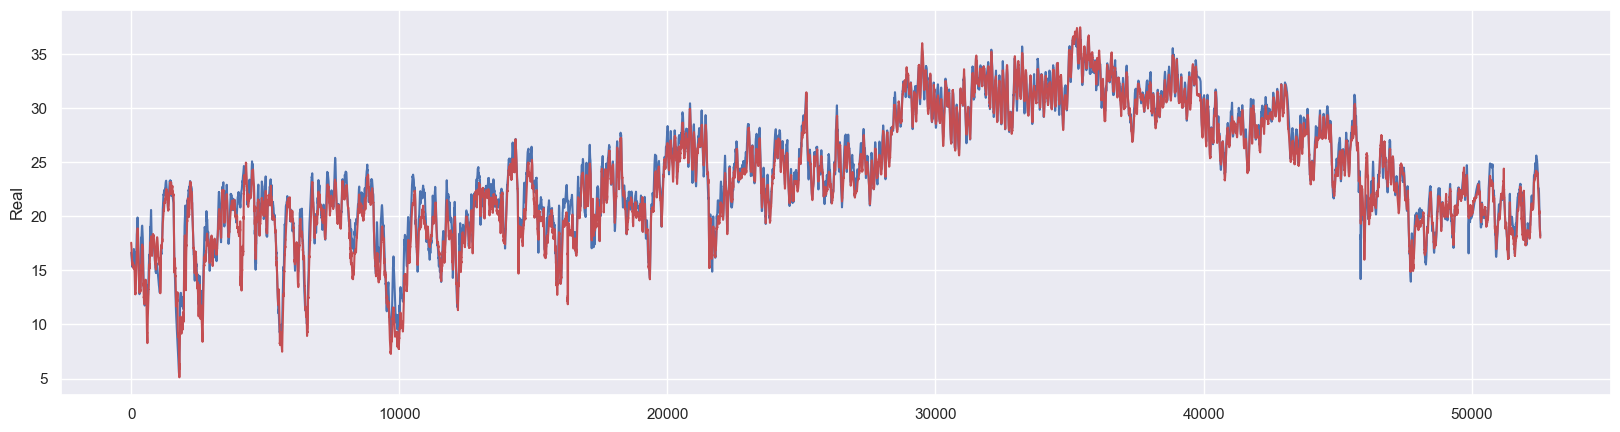

In [35]:
sns.set_theme(style = "darkgrid")
fig, axs = plt.subplots(figsize =(20, 5))
sns.lineplot(data =df_full, x=df_full.index, y="Real", ax=axs, color="b")
sns.lineplot(data =df_full, x=df_full.index, y="Prediction", ax=axs, color="r")

<AxesSubplot:ylabel='Difference'>

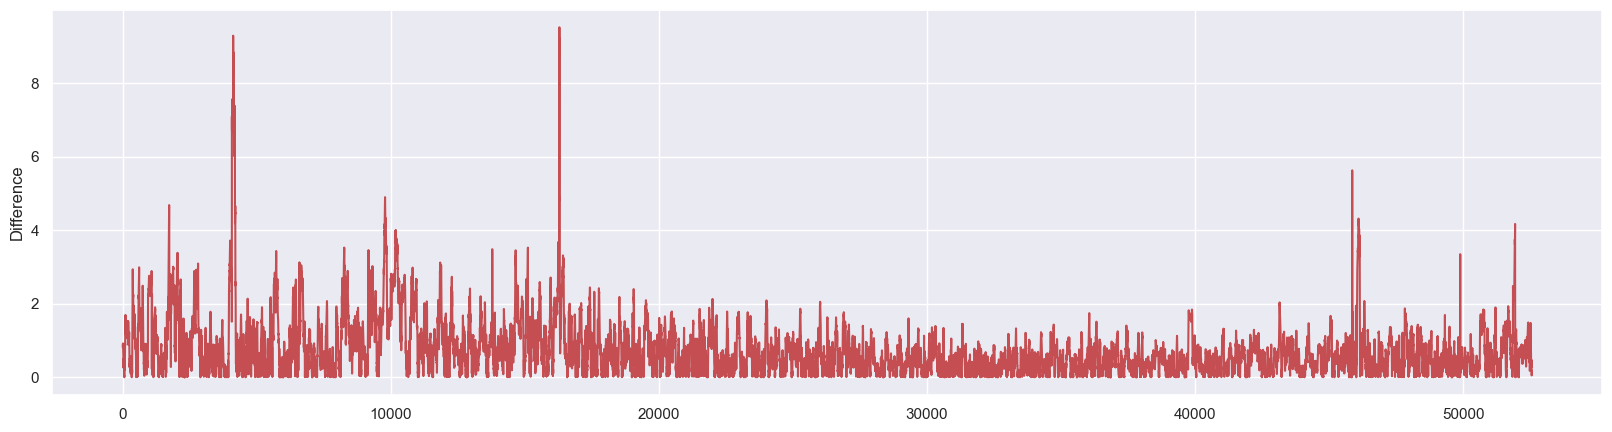

In [36]:
sns.set_theme(style = "darkgrid")
fig, axs = plt.subplots(figsize =(20, 5))
sns.lineplot(data =df_full['Difference'], ax=axs, color='r')

Moving Averange

In [37]:
def moving_average(df, value):
    list_ma = df.rolling(value,min_periods=1).mean()
    return list_ma

In [38]:
x2metr = np.concatenate((xtrain,xvalidation))
#x2metr = xtest

In [39]:
def split_sequencesfecha(sequences, n_steps):
    X = list()
    for i in range(len(sequences)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences):
            break
        # gather input and output parts of the pattern
        seq_x= sequences[end_ix-1]
        X.append(seq_x)
    return array(X)

In [64]:
fechatrain=split_sequencesfecha(training['date_time'], 144)
fechaval=split_sequencesfecha(validation['date_time'], 144)
fechatest=split_sequencesfecha(test['date_time'], 144)
#fechafull = fechatest
fechafull = np.concatenate((fechatrain,fechaval,fechatest))
#fechafull = np.concatenate((fechaval,fechatest))

In [65]:
tiempo = pd.DataFrame({'date_time': fechafull})

In [66]:
def ma(diferencia,numdatos):
    aux = pd.DataFrame(diferencia)
    #aux['Anomaly'] = pd.DataFrame(diferencia)
    auxma=moving_average(aux, numdatos)
    diferencia2=auxma[0:len(x2metr)-1]
    meandiff=np.mean(diferencia2)
    stdiff=np.std(diferencia2)
    tiempo["diferencia"]=auxma
    tiempo["target"]=0
    thr1 = meandiff + 6*stdiff
    thr2 = meandiff + 5*stdiff
    thr3 = meandiff + 3*stdiff
    thr4 = meandiff + 2*stdiff
    
    return auxma,meandiff,stdiff,thr1,thr2,thr3,thr4

In [67]:
auxma1,meandiff1,stdiff1,threshold1,threshold2,threshold3,threshold4=ma(df_full['Difference'],144)

In [68]:
def monthAgo(date):
    date = pd.to_datetime(date)
    month = date-timedelta(days=30)
    return month

def tagClass(dataframe,numClasses,startFailure):
    c=0.1
    dataframe=dataframe.copy()
    dataframe['date_time']=pd.to_datetime(dataframe['date_time'])
    for i in range(numClasses):
        if i==0:
            startDate=startFailure
            finishDate=monthAgo(startFailure)
            
            dataframe.loc[(dataframe['date_time']>=finishDate)&(dataframe['date_time']<startDate),'target']=0.1
        else:
            startDate=finishDate
            finishDate=monthAgo(finishDate)
            
            dataframe.loc[(dataframe['date_time']>=finishDate)&(dataframe['date_time']<startDate),'target']=c+0.1
        c+=0.1
    
    return dataframe

In [69]:
datatest1=tagClass(tiempo,6,pd.to_datetime("21/05/2018").replace(minute=0, hour=0, second=0))
datatest1["meandiff"]=float(meandiff1)
datatest1["stdiff"]=float(stdiff1)

In [70]:
def threshold():
    datatest1["threshold1"]=float(threshold1)
    datatest1["threshold2"]=float(threshold2)
    datatest1["threshold3"]=float(threshold3)
    datatest1["threshold4"]=float(threshold4)
    return 

In [71]:
datatest1["meandiff"].shape

(52562,)

In [72]:
auxma1.shape

(52562, 1)

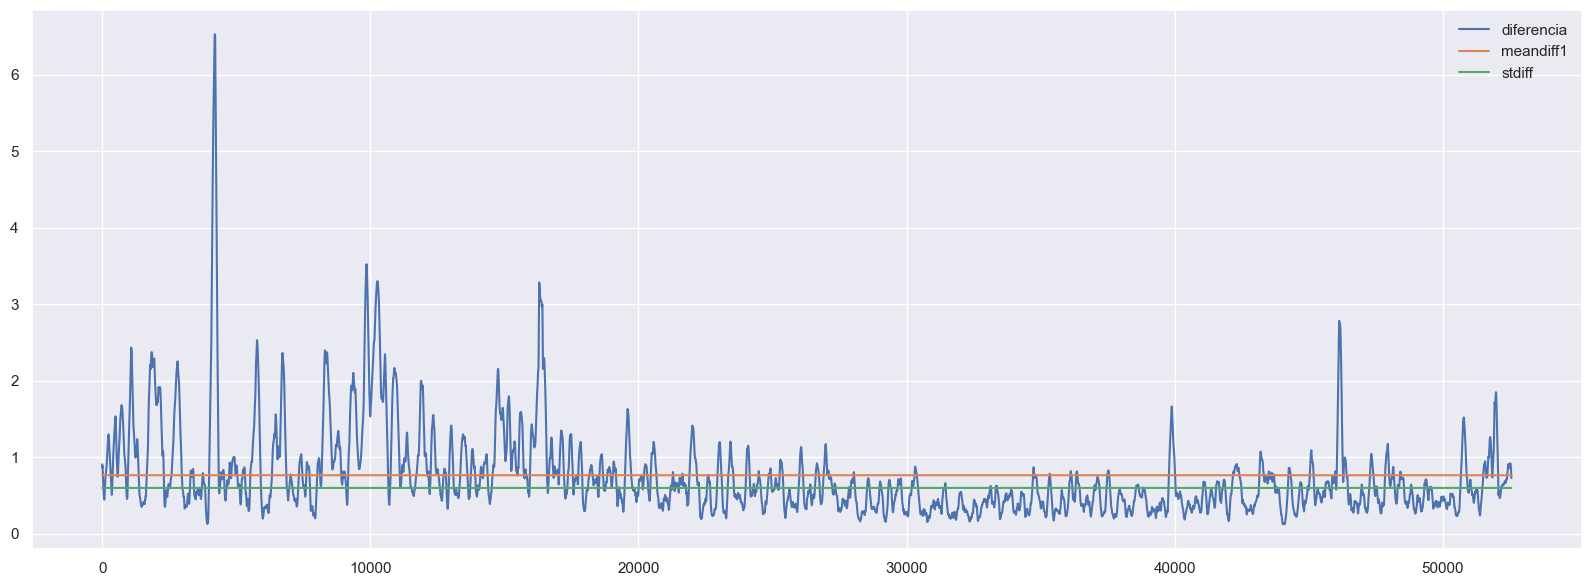

In [73]:
plt.figure(figsize=(20, 7))
plt.plot(auxma1, label='diferencia')
plt.plot(datatest1["meandiff"], label='meandiff1')
plt.plot(datatest1["stdiff"], label='stdiff')
plt.legend(frameon=False)

In [74]:
plt.savefig("Test2_mean.png")

<Figure size 640x480 with 0 Axes>

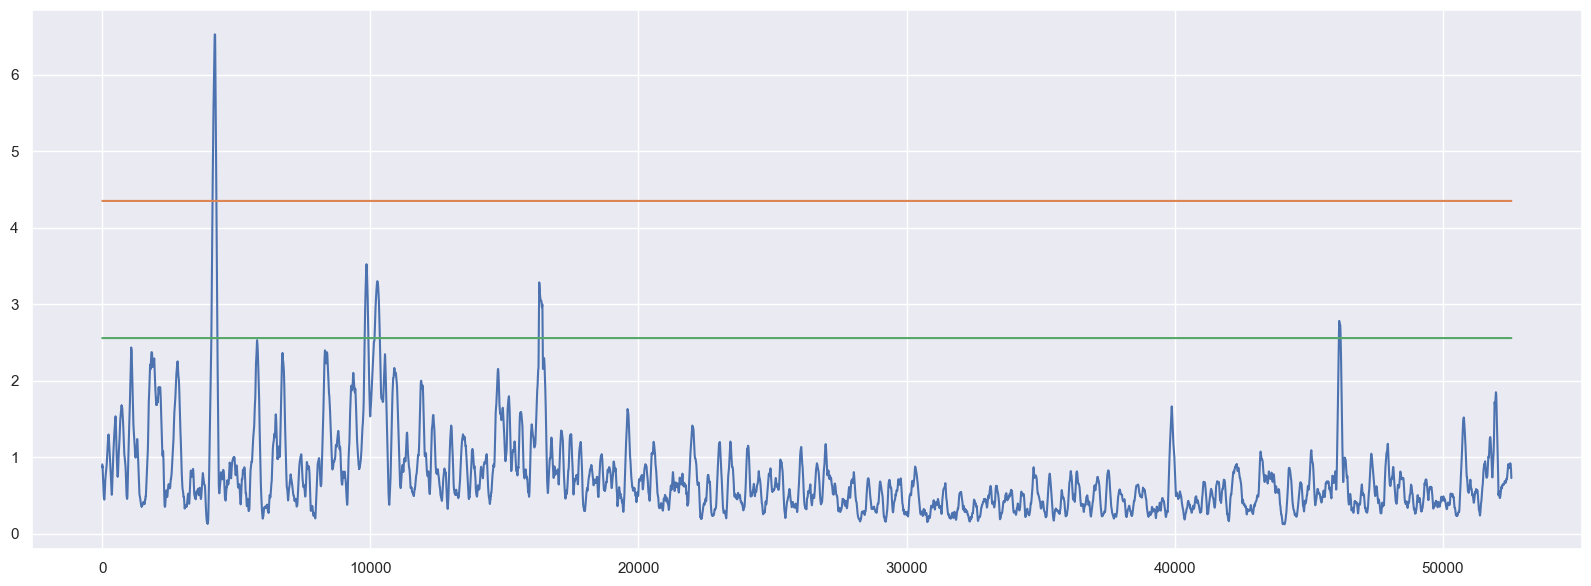

In [75]:
threshold()
plt.figure(figsize=(20, 7))
plt.plot(auxma1, label='diferencia')
plt.plot(datatest1["threshold1"], label='diferencia')
plt.plot(datatest1["threshold3"], label='diferencia')